In [1]:
import pandas as pd
import numpy as np
import random

In [45]:
df = pd.read_csv('materias.csv')

df.head()

,Unnamed: 0,Post_ID,Topic,Word_Count,Sentiment,Likes,Shares,Comments,Engagement,Z-Score,Eng_Level
0,0,1,Economy,781,0.28,95,37,2,175,-2.550651,Baixo
1,1,2,Health,780,-0.57,1089,393,209,2502,0.730266,Bom
2,2,3,Sports,438,0.50,1842,403,105,2963,1.380246,Bom
3,3,4,Politics,637,-0.10,1465,136,151,2190,0.290367,Bom
4,4,5,Sports,923,-0.88,1443,34,157,1982,-0.002900,Baixo


In [3]:
# criar coluna engajamento baseado na regra do negócio
# likes peso 1 - shares peso 2 - comments peso 3

df['Engagement'] = df['Likes'] + 2 * df['Shares'] + 3 * df['Comments']

df

,Post_ID,Topic,Word_Count,Sentiment,Likes,Shares,Comments,Engagement
0,1,Economy,781,0.28,95,37,2,175
1,2,Health,780,-0.57,1089,393,209,2502
2,3,Sports,438,0.50,1842,403,105,2963
3,4,Politics,637,-0.10,1465,136,151,2190
4,5,Sports,923,-0.88,1443,34,157,1982
...,...,...,...,...,...,...,...,...
295,296,Health,462,0.49,1249,82,114,1755
296,297,Economy,821,0.89,1903,136,287,3036
297,298,Sports,264,-0.98,1189,276,91,2014
298,299,Tech,646,0.01,1482,8,282,2344


In [4]:
eng_med = df['Engagement'].mean()

eng_med

1984.0566666666666

In [5]:
eng_std = df['Engagement'].std()

eng_std

709.2528643161698

In [6]:
df['Z-Score'] = (df['Engagement'] - eng_med)/eng_std


### df['Viral'] = df['Z-Score'] > 2

###df

In [ ]:
### df['Viral'].value_counts()

,count
Viral,
False,297
True,3


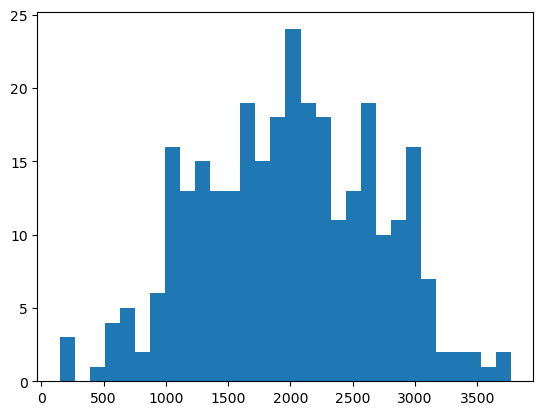

In [ ]:
# dataviz para observar a distribuição dos posts por engajamento

import matplotlib.pyplot as plt

plt.hist(df['Engagement'], bins = 30)
plt.show()

In [13]:
df['Topic'].value_counts(normalize=True).round(2)

Topic
Economy        0.17
Health         0.15
Environment    0.14
Culture        0.14
Sports         0.14
Politics       0.13
Tech           0.13
Name: proportion, dtype: float64

In [35]:
# reajustando o threshold do z-score para três níveis ao inves de 2

def classi(z):
  if z >= 0:
    return 'Bom' 
  else:
    return 'Baixo'

df['Eng_Level'] = df['Z-Score'].apply(classi)

df

,Post_ID,Topic,Word_Count,Sentiment,Likes,Shares,Comments,Engagement,Z-Score,Eng_Level
0,1,Economy,781,0.28,95,37,2,175,-2.550651,Baixo
1,2,Health,780,-0.57,1089,393,209,2502,0.730266,Bom
2,3,Sports,438,0.50,1842,403,105,2963,1.380246,Bom
3,4,Politics,637,-0.10,1465,136,151,2190,0.290367,Bom
4,5,Sports,923,-0.88,1443,34,157,1982,-0.002900,Baixo
...,...,...,...,...,...,...,...,...,...,...
295,296,Health,462,0.49,1249,82,114,1755,-0.322955,Baixo
296,297,Economy,821,0.89,1903,136,287,3036,1.483171,Bom
297,298,Sports,264,-0.98,1189,276,91,2014,0.042218,Bom
298,299,Tech,646,0.01,1482,8,282,2344,0.507496,Bom


In [11]:
pd.crosstab(df['Topic'], df['Eng_Level'], normalize='columns').round(2)

Eng_Level,Baixo,Normal,Viral
Topic,,,
Culture,0.14,0.19,0.00
Economy,0.17,0.11,0.31
Environment,0.14,0.16,0.19
Health,0.15,0.16,0.25
Politics,0.13,0.14,0.06
Sports,0.13,0.16,0.12
Tech,0.14,0.08,0.06


In [36]:
df['Eng_Level'].value_counts()

Eng_Level
Baixo    152
Bom      148
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# encoding a variavel topic

df_ecd = pd.get_dummies(df, columns=['Topic'], drop_first=True)

df_ecd

,Post_ID,Word_Count,Sentiment,Likes,Shares,Comments,Engagement,Z-Score,Eng_Level,Topic_Economy,Topic_Environment,Topic_Health,Topic_Politics,Topic_Sports,Topic_Tech
0,1,781,0.28,95,37,2,175,-2.550651,Baixo,True,False,False,False,False,False
1,2,780,-0.57,1089,393,209,2502,0.730266,Bom,False,False,True,False,False,False
2,3,438,0.50,1842,403,105,2963,1.380246,Bom,False,False,False,False,True,False
3,4,637,-0.10,1465,136,151,2190,0.290367,Bom,False,False,False,True,False,False
4,5,923,-0.88,1443,34,157,1982,-0.002900,Baixo,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,462,0.49,1249,82,114,1755,-0.322955,Baixo,False,False,True,False,False,False
296,297,821,0.89,1903,136,287,3036,1.483171,Bom,True,False,False,False,False,False
297,298,264,-0.98,1189,276,91,2014,0.042218,Bom,False,False,False,False,True,False
298,299,646,0.01,1482,8,282,2344,0.507496,Bom,False,False,False,False,False,True


In [39]:
#features
X = df_ecd[['Word_Count', 'Sentiment'] + 
           [col for col in df_ecd.columns if col.startswith('Topic_')]]

# target
y = df_ecd['Eng_Level']

In [40]:
# seperando os dados entre treino (70%) e teste (30%)

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y,
    test_size = 0.3,
    stratify=y,
    random_state = 42
)

In [41]:
# treinar modelo Random Forest

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_treino, y_treino)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [42]:
# avaliando

y_pred = model.predict(X_teste)

print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

       Baixo       0.53      0.54      0.54        46
         Bom       0.51      0.50      0.51        44

    accuracy                           0.52        90
   macro avg       0.52      0.52      0.52        90
weighted avg       0.52      0.52      0.52        90



In [ ]:
# para saber quais as features estão influenciando mais

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

importance.head(10)

,Feature,Importance
0,Word_Count,0.464442
1,Sentiment,0.433961
3,Topic_Environment,0.018868
4,Topic_Health,0.017874
2,Topic_Economy,0.017545
6,Topic_Sports,0.016761
7,Topic_Tech,0.015396
5,Topic_Politics,0.015153
